# **Advent of Code 2022**

In [144]:
from __future__ import annotations
import numpy as np
import pandas as pd
from functools import reduce
import copy
from dataclasses import dataclass, field

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np


## **1. Advent**

In [2]:
l = [i.split("\n") for i in open("inputs22/1").read().split("\n\n")]
s = [sum([int(i) for i in sl]) for sl in l]
print(f"Task 1: {max(s)}, Task 2: {sum(sorted(s)[-3:])}")

Task 1: 69795, Task 2: 208437


## **2. Advent**

In [3]:
# df = pd.read_csv("inputs22/2", header=None, sep=" ")
# t = lambda i: df.apply(lambda row: f(row[0], row[1])[i], axis=1).sum()
# def f(opp, you):
#     match (opp, you):
#         case ("A", "A"): return (3 + 1), (0 + 3)
#         case ("B", "X"): return (0 + 1), (0 + 1)
#         case ("C", "X"): return (6 + 1), (0 + 2)
#         case ("A", "Y"): return (6 + 2), (3 + 1)
#         case ("B", "Y"): return (3 + 2), (3 + 2)
#         case ("C", "Y"): return (0 + 2), (3 + 3)
#         case ("A", "Z"): return (0 + 3), (6 + 2)
#         case ("B", "Z"): return (6 + 3), (6 + 3)
#         case ("C", "Z"): return (3 + 3), (6 + 1)
# print(f"Task 1: {t(0)}, Task 2: {t(1)}")

## **3. Advent**

In [4]:
l = open("inputs22/3").read().split("\n")
t = [(s[:len(s)//2], s[len(s)//2:]) for s in l]
t2 = [l[i:i+3] for i in range(0, len(l), 3)]
scorer = lambda s: [ord(x) - (96 if x.islower() else 38) for x in s]
intersector = lambda t: [set.intersection(*[set(i) for i in p]).pop() for p in t]
f = lambda t: sum(scorer(intersector(t)))
print(f"Task 1: {f(t)}, Task 2: {f(t2)}")

Task 1: 8123, Task 2: 2620


## **4. Advent**

In [5]:
l = [[[int(k) for k in j.split("-")] for j in i.split(",")] for i in open("inputs22/4").read().split("\n")]
splitter = lambda p: (set(range(p[0][0], p[0][1]+1)), set(range(p[1][0], p[1][1]+1)))
f1 = lambda s1, s2: s1.issubset(s2) or s2.issubset(s1)
f2 = lambda s1, s2: (s1 & s2) != set()
r = lambda f: reduce(lambda b, p: f(*splitter(p)) + b, l, 0)
print(f"Task 1: {r(f1)}, Task 2: {r(f2)}")

Task 1: 466, Task 2: 865


## **5. Advent**

In [6]:
crates_s, insts_s = open("inputs22/5").read().split("\n\n")

N = int(crates_s.split(" ")[-2])
C = [[] for _ in range(N)]
for line in crates_s.split("\n")[:-1]:
    for i, ci in enumerate(range(1, 4*N, 4)):
        c = line[ci]
        if c != " ": C[i].insert(0, c)

l = [i.split(" ") for i in insts_s.split("\n")]
I = [[int(sl[i]) for i in [1,3,5]] for sl in l]

split = lambda l, i: (l[:i], l[i:])

def mover(C, inst, mn):
    num_crates, orig, dest = inst[0], inst[1]-1, inst[2]-1
    C[orig], c = split(C[orig], -num_crates)
    C[dest] += reversed(c) if mn == 9000 else c
    return C

mover_reduce = lambda mn: reduce(lambda c, inst: mover(c, inst, mn), I, copy.deepcopy(C))
f = lambda mn: "".join([c[-1] for c in mover_reduce(mn)])
print(f"Task 1: {f(9000)}, Task 2: {f(9001)}")

Task 1: LBLVVTVLP, Task 2: TPFFBDRJD


## **6. Advent**

In [7]:
s = open("inputs22/6").read()
f = lambda n: [i+n for i in range(len(s)-n) if len(set(s[i:i+n])) == n][0]
print(f"Task 1: {f(4)}, Task 2: {f(14)}")

Task 1: 1198, Task 2: 3120


In [8]:
s = open("inputs22/7t").read().split("$ ")
ss = [i.split("\n") for i in s]
ss[-1].append("hack")
sss = [j[:-1] for j in ss[1:]]

class Node:
    parent: 'Dir' | None
    name: str
    level: int

    def __init__(self, parent, name, level):
        self.parent = parent
        self.name = name
        self.level = level

class File(Node):
    size: int

    def __init__(self, parent, name, size, level):
        self.size = size
        super().__init__(parent, name, level)

    def __repr__(self):
        return f"{self.name} (file, size={self.size})"

class Dir(Node):
    children: dict[str, Node]
    def __init__(self, parent, name, children, level):
        self.children = children
        super().__init__(parent, name, level)

    def add_dir(self, Dir):
        if Dir.name not in self.children:
            self.children[Dir.name] = Dir

    def add_file(self, File):
        if File.name not in self.children:
            self.children[File.name] = File

    def get_subdir(self, name):
        if name in self.children:
            return self.children[name]
        else:
            print("does this happen?")

    def get_size(self):
        total = 0
        for c in self.children:
            if isinstance(c, File): total += File.size
            if isinstance(c, Dir): total += Dir.get_size()
        return total

    def __repr__(self):
        string = f"{self.name} (dir)"
        for c in self.children:
            string += "\n- " + " " * (self.level)
            string += c.__repr__()
        return string
        

ROOT = Dir(name='', parent=None, level=0, children={})
FS = ROOT

for i, line in enumerate(sss):
    comargs, *outs = line
    com, *args = comargs.split(" ")
    match com:
        case "cd":
            match args[0]:
                case "..": FS = FS.parent
                case "/": FS = ROOT
                case x: FS = FS.get_subdir(x)

        case "ls":
            for out in outs:
                match out.split(" "):
                    case ("dir", name):
                        nd = Dir(name=name, parent=FS, level=FS.level+1, children={})
                        # print("123", nd.children)
                        FS.add_dir(nd)
                        # print("456", FS.children[nd.name].children)

                    case (size, name):
                        FS.add_dir(File(name=name, size=size, parent=FS, level=FS.level+1))


ROOT.get_size()

0

In [9]:
"123/".split("/")

['123', '']

In [10]:
from enum import Enum


class l(Enum):
    H = 1
    T = 2
    HT = 3

l.H
l.T

import numpy as np

np.random.choice([l.H, l.T], size=10)

array([<l.H: 1>, <l.H: 1>, <l.T: 2>, <l.H: 1>, <l.T: 2>, <l.H: 1>,
       <l.H: 1>, <l.T: 2>, <l.T: 2>, <l.T: 2>], dtype=object)

In [11]:
# s = [i.split(" ") for i in open("inputs22/8t").read().split("\n")]
# ss = [[x, int(y)] for x, y in s]

# G = np.zeros((1000,1000,3), dtype=bool)

# # G[500,500] = 1
# # i, j = 
# Hi, Hj = 0,0
# Ti, Tj = 0,0

# def compute_consequence(H, T):
    


# for step in ss:
#     match step:
#         case "R", i:
#             Hj += 1



In [12]:
I = [i.split(" ") for i in open("inputs22/9").read().split("\n")]

X = 1
c = 0
C = [X]

print(len(I))
print(len(I) )


for inst in I:
    match inst:
        case ["noop"]:
            C += [X]
        case "addx", i:
            C += [X]
            C += [X]
            X += int(i)
        case _: print("problem")
C += [X]

# print(len(C))
# print(C[20], C[:20])
l = [C[20], C[60], C[100], C[140], C[180], C[220]]
print(l)
l = [C[20]*20, C[60]*60, C[100]*100, C[140]*140, C[180]*180, C[220]*220]

# C[219:]
print(sum(l))

138
138
[17, 17, 7, 21, 21, 17]
12520


In [13]:
A = np.array(C[1:-1]).reshape(-1, 40)
IDX = np.vstack(list(np.arange(40))*6).reshape(-1,40)

R = np.abs(A - IDX) <= 1

for row in R:
    for el in row:
        if el: 
            print("█", end="")
        else:
            print(" ", end="")
    print()




████ █  █ ███  ████ ███    ██  ██  █    
█    █  █ █  █    █ █  █    █ █  █ █    
███  ████ █  █   █  █  █    █ █    █    
█    █  █ ███   █   ███     █ █ ██ █    
█    █  █ █    █    █    █  █ █  █ █    
████ █  █ █    ████ █     ██   ███ ████ 


In [14]:


input


<bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x7f757ea3cd90>>

In [15]:
a = slice(1,2)

[1,2,3,4,5][a]

[2]

In [16]:
jets = open("inputs22/17").read()

dash = np.array([[i for i in j] for j in "0000.0000.0000.1111".split(".")], dtype=int)
plus = np.array([[i for i in j] for j in "0000.0100.1110.0100".split(".")], dtype=int)
invl = np.array([[i for i in j] for j in "0000.0010.0010.1110".split(".")], dtype=int)
pipe = np.array([[i for i in j] for j in "1000.1000.1000.1000".split(".")], dtype=int)
rect = np.array([[i for i in j] for j in "0000.0000.1100.1100".split(".")], dtype=int)
test = np.array([[i for i in j] for j in "1111.1111.1111.1111".split(".")], dtype=int)

rocks = [dash, plus, invl, pipe, rect]

H = 4000
w = 4
rs = 4

C = np.zeros((H, 7 + (2*w)), dtype=int)
C[:, :w] = 1
C[:, -w:] = 1
C[-w:, :] = 1

# print(C[-10:])


def get_start_idx(C):
    for i, line in enumerate(C):
        if sum(line) > (2*w):
            return [i-(3+rs), i-3, w+2, w+2+rs]

def p2s(pos):
    return (slice(pos[0], pos[1]), slice(pos[2], pos[3]))

def jetmove(pos, jet):
    match jet:
        case ">":
            return [pos[0], pos[1], pos[2]+1, pos[3]+1]
        case "<":
            return [pos[0], pos[1], pos[2]-1, pos[3]-1]

def downmove(pos):
    return [pos[0]+1, pos[1]+1, pos[2], pos[3]]

def get_next_jet():
    for i in range(100_000_000):
        yield jets[i % len(jets)]
jetgen = get_next_jet()

def print_fucking_tower(T):
    lastpos = get_start_idx(T)
    print()
    for line in T[lastpos[0]:-w, w:-w]:
        for i in line:
            if i == 0: print(".", end="")
            if i == 1: print("#", end="")
        print()
    print()

for i in range(2022):
    rock = rocks[i%len(rocks)]
    pos = get_start_idx(C)
    # if (i%100) == 0:
    #     print(f"Rock {i}, start {pos}", end=" | ")
    assert(np.sum(C[p2s(pos)]) == 0) # verify we can place it

    # print("starting pos")
    # D = C.copy()
    # D[p2s(pos)] = rock
    # print_fucking_tower(D)

    for j in range(100_000_000_000):
        if j%2 == 0:
            jet = next(jetgen)
            # print(jet)
            nextpos = jetmove(pos, jet)
            if np.any(C[p2s(nextpos)] + rock >= 2):
                continue
            else:
                pos = nextpos
        else:
            nextpos = downmove(pos)
            if np.any(C[p2s(nextpos)] + rock >= 2):
                C[p2s(pos)] += rock
                break
            else:
                pos = nextpos

    # print_fucking_tower(C)


for i, line in enumerate(C):
    if sum(line) > (2*w):
        break

print(H - i - w)

3083


In [17]:
l = open("inputs22/18").read().split("\n")
l = [[int(i) for i in x.split(",")] for x in l]

D = 20
X = np.zeros((D,D,D))

for x,y,z in l:
    X[x,y,z] = 1

def get_neighbours(A, x,y,z):
    total = 0
    if x < D-1: total += A[x+1,y,z]
    if x > 0  : total += A[x-1,y,z]
    if y < D-1: total += A[x,y+1,z]
    if y > 0  : total += A[x,y-1,z]
    if z < D-1: total += A[x,y,z+1]
    if z > 0  : total += A[x,y,z-1]
    return total

total = 0
for i in range(D):
    for j in range(D):
        for k in range(D):
            if X[i,j,k] == 0:
                continue
            else:
                n = get_neighbours(X, i,j,k)
                shown_sides = 6 - n
                total += shown_sides

print(total)


def get_neighbour_coords(x,y,z):
    total = []
    if x < D-1: total.append((x+1,y,z))
    if x > 0: total.append((x-1,y,z))
    if y < D-1: total.append((x,y+1,z))
    if y > 0: total.append((x,y-1,z))
    if z < D-1: total.append((x,y,z+1))
    if z > 0: total.append((x,y,z-1))
    return total


L = [(0,0,0)]
V = []
C = np.zeros_like(X)

while True:
    if L == []:
        break
    x,y,z = L.pop()

    # check if already checked:
    if C[x,y,z] == 1:
        continue

    # check if air or lava
    if X[x,y,z] == 0:
        # its air, and we check its neighbours
        C[x,y,z] = 1
        neighbours = get_neighbour_coords(x,y,z)
        L += neighbours
    else:
        # its lava, so we move on
        continue


# C.sum()
T = 1 - (C + X)

# print(T.sum())

total2 = 0
for i in range(D):
    for j in range(D):
        for k in range(D):
            if T[i,j,k] == 0:
                continue
            else:
                n = get_neighbours(T, i,j,k)
                shown_sides = 6 - n
                total2 += shown_sides

print(total - total2)

3522.0
2074.0


In [30]:
D[1]

array([[ 4,  0,  0,  0],
       [ 2,  0,  0,  0],
       [ 3, 14,  0,  0],
       [ 2,  0,  7,  0]])

In [ ]:
# I = [s.split(" ") for s in open("inputs22/19t").read().split("\n")]

# D = {}
# for r in I:
#     arr = np.zeros((4,4), dtype=int)
#     arr[0,0] = int(r[6])
#     arr[1,0] = int(r[12])
#     arr[2,0] = int(r[18])
#     arr[2,1] = int(r[21])
#     arr[3,0] = int(r[27])
#     arr[3,2] = int(r[30])
#     D[int(r[1].split(":")[0])] = arr

# # def get_production_output(combination):
# #     oi, ri = combination
# #     new_ores = tuple([o+r for o, r in zip(oi, ri)])
# #     return (new_ores, ri)

# def get_possible_paths(M, combination):
#     oi, ri = combination
#     # oi = np.array(oi)
#     # ri = np.array(ri)
#     # pp = set()
#     pp = []
#     for i in range(4):
#         if np.all(oi >= M[i]):
#             new_oi = oi - M[i]
#             new_ri = ri.copy()
#             new_ri[i] += 1
#             # new_oi = tuple(new_oi)
#             # new_ri = tuple(new_ri)
#             new_comb = (new_oi, new_ri)
#             # pp |= {new_comb} | get_possible_paths(M, new_comb)
#             pp += [new_comb] + get_possible_paths(M, new_comb)
#     return pp

# # def get_possible_paths(M, combination):
# #     oi, ri = combination
# #     pp = set()
# #     for i in range(4):
# #         if all([o>=m for o,m in zip(oi, M[i])]):
# #             new_oi = tuple([o-m for o,m in zip(oi, M[i])])
# #             new_ri = tuple([x+1 if j == i else x for j,x in enumerate(ri)])
# #             new_comb = (new_oi, new_ri)
# #             pp |= {new_comb} | get_possible_paths(M, new_comb)
# #     return pp





# def optimize(combinations):
#     optimised_combinations = []

#     # first remove duplicates
#     for i, comb1 in enumerate(combinations):
#         # check if this robot combination is already in there
#         # if (oi, ri) in optimised_combinations:
#         dont_add = False
#         for j, comb2 in enumerate(optimised_combinations):
#             if np.all(comb1[0] == comb2[0]) and np.all(comb1[1] == comb2[1]):
#                 dont_add = True  # if exact combinatio in there, continue

#         if dont_add:
#             continue
#         else:
#             optimised_combinations.append(comb1)

#     # then optimise
#     optimised_combinations2 = []
#     for i, (_, ri) in enumerate(optimised_combinations):
#         same_ri_ois = []
#         for j, (oi2, ri2) in enumerate(optimised_combinations):
#             if np.all(ri == ri2):
#                 same_ri_ois.append(oi2)

#         # now decide which one to keep
#         same_ri_ois2 = []
#         for oi3 in same_ri_ois:
#             isout = False
#             for oi4 in same_ri_ois:
#                 if np.all(oi3 <= oi4) and not np.all(oi3 == oi4):
#                     # if this happens once, its out
#                     isout = True
#                     break
#             if isout: break
#             else:
#                 same_ri_ois2.append(oi3)

#         # we keep same_ri_ois2
#         for oi in same_ri_ois2:
#             optimised_combinations2.append((oi, ri))
    
#     return optimised_combinations2   
          

# # combinations = {((0,0,0,0), (1,0,0,0))}
# combinations = [(np.array([0,0,0,0]), np.array([1,0,0,0]))]
# RD = D[1]

# T = 24
# for t in range(T):
#     # new_combinations = set()
#     new_combinations = []
#     print(f"------ [Min {t+1}] -----")
#     print(len(combinations))
#     for comb in combinations:
#         ores, robots = comb
#         # paths = get_possible_paths(RD, comb) | {comb}
#         paths = get_possible_paths(RD, comb) + [comb]
#         # real_paths = set()
#         real_paths = []
#         for o,r in paths:
#             # no = tuple([x+y for x,y in zip(o, robots)])
#             newo = o + robots
#             # real_paths |= {(no,r)}
#             real_paths += [(newo,r)]
#         # new_combinations |= real_paths
#         new_combinations += real_paths

#     # print(f"new_combinations {new_combinations}")
#     new_combinations = optimize(new_combinations)
#     # print(f"new_combinations after {new_combinations}")
        
#     # print("OUTCOME")
#     # print("\n".join([f"ores: {x}, robots: {y}" for x,y in new_combinations]))
#     combinations = new_combinations
    

# # combinations


------ [Min 1] -----
1
------ [Min 2] -----
1
------ [Min 3] -----
1
------ [Min 4] -----
2
------ [Min 5] -----
3
------ [Min 6] -----
6
------ [Min 7] -----
8
------ [Min 8] -----
17
------ [Min 9] -----
25
------ [Min 10] -----
49
------ [Min 11] -----
64
------ [Min 12] -----
111
------ [Min 13] -----
163
------ [Min 14] -----
323
------ [Min 15] -----
401
------ [Min 16] -----
738


KeyboardInterrupt: 

Bad pipe message: %s [b'K\xef\x1ase\xd7\xc2\x86O\xc2UeW\x82\xb1N\xc5\xb8 \x14\x19\xc6)8\xa5V*9\xc6\xefbP$\xa1\xdb\x8a\\!\xd7\xc68@\xcbQ\xe2\xb7c%e\xf0\xc4\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03']
Bad pipe message: %s [b'\x08\x07\x08\x08\x08', b'\n\x08\x0b\x08\x04\x08\x05\x08']
Bad pipe message: %s [b'\x01\x05\x01\x06\x01']
Bad pipe message: %s [b'\xbc(\xaeL\xf2<R\x83']
Bad pipe message: %s [b".\x84\x1eQf\x92(\xcf6'\xf2;2\xef\x89\xa29a\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0

In [ ]:


    # if oi > M[0]



    # ri_changes = 



    # ri_changes = [
    #     []
    # ]



    # for i in [0,1]:
    #     ri_change = [0,0,0,0]
    #     oi_change = [0,0,0,0]
    #     ore_count = oi[i]
    #     ore_req = dic[i]
    #     if ore_count >= ore_req:
    #         ri_change[i] += 1
    #         oi_change[i] -= ore_req
    #         new_ri = tuple([ri[j] + ri_change[j] for j in range(4)])
    #         new_oi = tuple([oi[j] + oi_change[j] for j in range(4)])
    #         new_comb = (new_oi, new_ri)
    #         pp |= {new_comb} | get_possible_paths(dic, new_comb)

    # for i in [2,3]:
    #     ri_change = [0,0,0,0]
    #     oi_change = [0,0,0,0]
    #     # different --
    #     ore_count = (oi[0], oi[i])
    #     ore_req = dic[i]
    #     if ore_count[0] >= ore_req[0] and ore_count[1] >= ore_req[1]:
    #         ri_change[i] += 1
    #         oi_change[i] -= ore_req[1]
    #         oi_change[0] -= ore_req[0]
    #         # -- same from here on
    #         new_ri = (ri[j] + ri_change[j] for j in range(4))
    #         new_oi = (oi[j] + oi_change[j] for j in range(4))
    #         new_comb = (new_oi, new_ri)
    #         pp |= {new_comb} | get_possible_paths(dic, new_comb)
    # return pp

# for robot_dic in D:
#     print(robot_dic)
robot_dic = D[0]
# robot_dic = {0:1, 1:1, 2:(1,1), 3:(1,1)}
# while len(combinations) != 0:
#     print("------------------")
#     print(combinations)
#     i += 1
#     comb = combinations.pop()
#     new_comb = get_production_output(comb)
#     # add the new comb (doing nothing) to the possible paths
#     paths = {new_comb} | get_possible_paths(robot_dic, new_comb)
#     mod_paths = {(oi,ri,tt-1) for oi,ri,tt in paths}
#     combinations |= mod_paths
#     if i == 10:
#         print("break")
#         break


In [ ]:

        # best_oi

            
        #         if np.all(oi >= oi2):
        #             optimised_combinations2.append((oi, ri))
        #         else: # they are uncomparably different
        #             optimised_combinations2.append((oi, ri))





        # else:
        #     noc = []
        #     add_to_oc = True
        #     for j, (ooi, ori) in optimised_combinations:
        #         if ri == ori:
                    
        #                 noc += [(oi, ri)]
        #             else:
        #                 noc += [(oi, ri), (ooi, ori)]
                     

In [8]:
# def remove_worst(oi_list):
#     # remove those that are trumped in each index
#     new_list = []
#     for oi in oi_list:
#         isout = False
#         for oi2 in oi_list:
#             # if oi is strictly worse than other ois
#             if isworse(oi, oi2):
#                 isout = True
#                 break
#         if not isout:
#             new_list.append(oi)
#     return new_list

# def isworse(x, y):
#     # if worse or equal in all categories and not the same (hence at least strictly worse in one of them)
#     return x[0] <= y[0] and x[1] <= y[1] and x[2] <= y[2] and x[3] <= y[3] and x != y


# def optimize(combinations):
#     optimised_combinations = {ri:[] for _, ri in combinations}

#     for oi,ri in combinations:
#         optimised_combinations[ri].append(oi)

#     optimised_combinations[ri] = remove_worst(optimised_combinations[ri])

#     returnset = set()
#     for ri, oi_list in optimised_combinations.items():
#         returnset |= {(oi,ri) for oi in oi_list}

#     return returnset

In [4]:
I = [s.split(" ") for s in open("inputs22/19t").read().split("\n")]
D = {}
for r in I:
    arr = np.zeros((4,4), dtype=int)
    arr[0,0] = int(r[6])
    arr[1,0] = int(r[12])
    arr[2,0] = int(r[18])
    arr[2,1] = int(r[21])
    arr[3,0] = int(r[27])
    arr[3,2] = int(r[30])
    D[int(r[1].split(":")[0])] = arr

def optim(paths, N):
    new_paths = set()
    for comb in paths:
        (*_, geodes), _ = comb
        if geodes >= N:
            new_paths.add(comb)
    return new_paths


def get_possible_paths(M, combination):
    oi, ri = combination
    pp = set()
    for i in range(4):
        if oi[0] >= M[i,0] and oi[1] >= M[i,1] and oi[2] >= M[i,2] and oi[3] >= M[i,3]:
            new_oi = (oi[0] - M[i,0], oi[1] - M[i,1], oi[2] - M[i,2], oi[3] - M[i,3])
            new_ri = tuple([x+1 if j == i else x for j,x in enumerate(ri)])
            new_comb = (new_oi, new_ri)
            pp.add(new_comb) #| get_possible_paths(M, new_comb)
    return pp

RD = D[1]

total = 0

T = 24
for id, RD in D.items():
    print(id)
    combinations = {((0,0,0,0), (1,0,0,0))}
    for t in range(T):
        new_combinations = set()
        print(f"------ [Min {t+1}] -----", end=" ==> ")
        print(len(combinations))
        for comb in combinations:
            ores, robots = comb
            paths = get_possible_paths(RD, comb) | {comb}
            real_paths = set()
            for o,r in paths:
                no = tuple([x+y for x,y in zip(o, robots)])
                real_paths |= {(no,r)}
            new_combinations |= real_paths
        if t >= 19:
            new_combinations = optim(new_combinations, 1)
        combinations = new_combinations
    maxgeodes = 0
    for (_,_,_,geodes), _ in combinations:
        maxgeodes = max(maxgeodes, geodes)
    print("quality level: ", id * maxgeodes)
    total += id * maxgeodes
    

# combinations


1
------ [Min 1] ----- ==> 1
------ [Min 2] ----- ==> 1
------ [Min 3] ----- ==> 1
------ [Min 4] ----- ==> 2
------ [Min 5] ----- ==> 3
------ [Min 6] ----- ==> 7
------ [Min 7] ----- ==> 11
------ [Min 8] ----- ==> 25
------ [Min 9] ----- ==> 44
------ [Min 10] ----- ==> 101
------ [Min 11] ----- ==> 202
------ [Min 12] ----- ==> 446
------ [Min 13] ----- ==> 906
------ [Min 14] ----- ==> 1877
------ [Min 15] ----- ==> 3902
------ [Min 16] ----- ==> 8316
------ [Min 17] ----- ==> 18180
------ [Min 18] ----- ==> 40433
------ [Min 19] ----- ==> 89829
------ [Min 20] ----- ==> 196130
------ [Min 21] ----- ==> 2302
------ [Min 22] ----- ==> 6823
------ [Min 23] ----- ==> 21932
------ [Min 24] ----- ==> 78195
quality level:  9
2
------ [Min 1] ----- ==> 1
------ [Min 2] ----- ==> 1
------ [Min 3] ----- ==> 1
------ [Min 4] ----- ==> 2
------ [Min 5] ----- ==> 4
------ [Min 6] ----- ==> 9
------ [Min 7] ----- ==> 22
------ [Min 8] ----- ==> 57
------ [Min 9] ----- ==> 146
------ [Min 10] -

: 

: 

In [ ]:
total

# 20

In [25]:
l = [[int(i),j] for j,i in enumerate(open("inputs22/20t").read().split("\n"))]

key = 811589153

init = copy.copy(l)
print(f"IN {[x for x, _ in l]}")
n = len(l)

for item in init:
    value, _ = item
    current_pos = l.index(item)
    new_pos = (current_pos + value) % (n-1)
    val = l.pop(current_pos)
    l.insert(new_pos, val)

print(f"OUT {[x for x, _ in l]}")

for i, (v,_) in enumerate(l):
    if v == 0:
        break

print(l[(i+1000)%n][0] + l[(i+2000)%n][0] + l[(i+3000)%n][0])

IN [1, 2, -3, 3, -2, 0, 4]
OUT [-2, 1, 2, -3, 4, 0, 3]
3


In [32]:
# part 2

key = 811589153
l = [[int(i)*key,j] for j,i in enumerate(open("inputs22/20").read().split("\n"))]


init = copy.copy(l)

# print(f"IN {[x for x, _ in l]}")
n = len(l)

for round in range(10):
    for item in init:
        value, _ = item
        current_pos = l.index(item)
        new_pos = (current_pos + value) % (n-1)
        val = l.pop(current_pos)
        l.insert(new_pos, val)

    # print(f"OUT {[x for x, _ in l]}")

for i, (v,_) in enumerate(l):
    if v == 0:
        break

print(l[(i+1000)%n][0] + l[(i+2000)%n][0] + l[(i+3000)%n][0])

3338877775442


# 21

In [13]:
monkeys = open("inputs22/21t").read().split("\n")
M = []
D = {}
for m in monkeys:
    name, op = m.split(": ")
    
    ops = op.split(" ")
    if len(ops) == 1:
        D[name] = int(ops[0])
    else:
        match ops[1]:
            case "+": f = lambda a, b: a + b
            case "-": f = lambda a, b: a - b
            case "*": f = lambda a, b: a * b
            case "/": f = lambda a, b: a / b
        M.append((name, ops[0], ops[2], f))

while M:
    m = M.pop(0)
    name, m1, m2, mf = m
    if m1 in D:
        if m2 in D:
            D[name] = mf(D[m1],D[m2])
            continue
    M.append(m)

D["root"]




70674280581468.0

In [60]:
import sympy

x = sympy.Symbol("x")

monkeys = open("inputs22/21").read().split("\n")
M = []
D = {}
for m in monkeys:
    name, op = m.split(": ")
    ops = op.split(" ")

    if len(ops) == 1:
        num = int(ops[0])

    match name:
        case "root":
            ops[1] = "=="
        case "humn":
            num = x
    
    if len(ops) == 1:
        D[name] = num
    else:
        match ops[1]:
            case "+": f = lambda a, b: a + b
            case "-": f = lambda a, b: a - b
            case "*": f = lambda a, b: a * b
            case "/": f = lambda a, b: a / b  # needs to be float div
            case "==": f = lambda a, b: a == b
        M.append((name, ops[0], ops[2], f))

while len(M) > 1:
    m = M.pop(0)
    if m[0] == "root": M.append(m); continue
    name, m1, m2, mf = m
    if m1 in D:
        if m2 in D:
            D[name] = mf(D[m1],D[m2])
            continue
    M.append(m)

name, m1, m2, _ = M[0]


sympy.solve(D[m1] - D[m2], x)

[3243420789721.00]

In [86]:
A = open("inputs22/22").read().split("\n")
*L, _, s = A

maxlen = 0
for l in L:
    maxlen = max(maxlen, len(l))

print(maxlen)
for i,l in enumerate(L):
    # print(len(l))
    while len(l) != maxlen:
        l = l + " "
    L[i] = l

M = np.zeros((len(L)+2, maxlen+2))
print(M.shape, len(L), len(L[70]))
for i, l in enumerate(L):
    for j, item in enumerate(l):
        ii = i + 1
        jj = j + 1
        match item:
            case " ": filler = 0
            case ".": filler = 1
            case "#": filler = 2
        M[ii,jj] = filler

def printM(A, pos):
    for i, line in enumerate(M):
        for j, it in enumerate(line):
            if i == pos[0] and j == pos[1]:
                    # print("X", end="")
                    continue
            match it:
                case 0: print(".", end="")
                case 1: print("░", end="")
                case 2: print("█", end="")
        print()

def move(M, direction, steps, pos, cubemap={}):
    prev_pos = pos.copy()
    for step in range(steps):
        new_pos = prev_pos + direction
        while True:
            if new_pos[0] >= M.shape[0]: new_pos[0] = 0
            if new_pos[1] >= M.shape[1]: new_pos[1] = 0
            if new_pos[0] < 0: new_pos[0] = M.shape[0] - 1
            if new_pos[1] < 0: new_pos[1] = M.shape[1] - 1
            match M[tuple(new_pos)]:
                case 0:  # in limbo
                    new_pos += direction
                    continue
                case 1:  # safe position
                    prev_pos = new_pos
                    break
                case 2:  # need to go back
                    prev_pos = prev_pos
                    break
    # the real new pos is the prev pos
    return prev_pos

def get_direction(current, turn):
    match tuple(current), turn:
        case [0, 1], "R": return np.array([ 1,0])
        case [0, 1], "L": return np.array([-1,0])
        case [0,-1], "R": return np.array([-1,0])
        case [0,-1], "L": return np.array([ 1,0])
        case [1, 0], "R": return np.array([0,-1])
        case [1, 0], "L": return np.array([0, 1])
        case [-1,0], "R": return np.array([0, 1])
        case [-1,0], "L": return np.array([0,-1])

try:
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            if M[i,j] == 1:
                start_pos = np.array([i,j])
                1/0
except:
    pass
# print(start_pos)

l = list(s)
nl = [""]
while l:
    nxt = l.pop(0)
    if nxt in ["R", "L"]:
        nl += [nxt, ""]
    else:
        nl[-1] += nxt
nnl = []
for x in nl:
    try:
        nnl.append(int(x))
    except:
        nnl.append(x)
# print(nnl)

# printM(M, start_pos)
# print("----")

dire = np.array([0,1])
pos = start_pos.copy()

for op in nnl:
    match op:
        case "R" | "L":
            dire = get_direction(dire, op)
        case num:
            pos = move(M, dire, num, pos)
    # print(op)
    # printM(M, pos)
    # print("\n\n")
    
row, col = pos
match tuple(dire):
    case (0,1): facing = 0
    case (1,0): facing = 1
    case (0,-1): facing = 2
    case (-1,0): facing = 3

print(sum((1000*row, 4*col, facing)))


150
(202, 152) 200 150
189140


In [193]:
def next_state(N):
    N[0, 1:-1, 1:-1] = np.roll(N[0, 1:-1, 1:-1],  1, axis=1)  # right
    N[1, 1:-1, 1:-1] = np.roll(N[1, 1:-1, 1:-1],  1, axis=0)  # down
    N[2, 1:-1, 1:-1] = np.roll(N[2, 1:-1, 1:-1], -1, axis=1)  # left
    N[3, 1:-1, 1:-1] = np.roll(N[3, 1:-1, 1:-1], -1, axis=0)  # up
    return N

def get_possible_paths(pos,N):
    i,j = pos
    ps = set()
    if N[:, i,   j].max() == 0: ps.add((i,j))
    if N[:, i+1, j].max() == 0: ps.add((i+1,j))
    if N[:, i-1, j].max() == 0: ps.add((i-1,j))
    if N[:, i, j+1].max() == 0: ps.add((i,j+1))
    if N[:, i, j-1].max() == 0: ps.add((i,j-1))
    return ps

L = open("inputs22/24t").read().split("\n")
M = np.zeros((4, len(L), len(L[0]))).astype(int)
for i, l in enumerate(L):
    for j, itm in enumerate(l):
        fw = 0
        match itm:
            case "#": M[:,i,j] = 1
            case ">": M[0,i,j] = 1
            case "v": M[1,i,j] = 1
            case "<": M[2,i,j] = 1
            case "^": M[3,i,j] = 1

start = (0,1)
# end = (2,1)
end = (M.shape[1]-1, M.shape[2]-2)
print(f"end: {end}")
P = {start}
print

# while True:
for i in range(10000):
    # print(f"{i}: {P}")
    Pnew = set()
    for (pi,pj) in P:
        if M[:, pi, pj].max() == 0:
            Pnew.add((pi,pj))
    P = Pnew
    nP = set()

    M2 = next_state(M)
    
    D = M2.copy()
    # plt.imshow(D.max(axis=0)); plt.show()

    for p in P:
        # print(f"in {p}")
        nnP = get_possible_paths(p, M2)
        # print(f"possible moves {nnP}")
        nP |= nnP
    if end in nP:
        P = nP
        M = M2
        break
    else:
        P = nP
        M = M2

to_end_1 = i+1
print(to_end_1)

end: (5, 6)
18


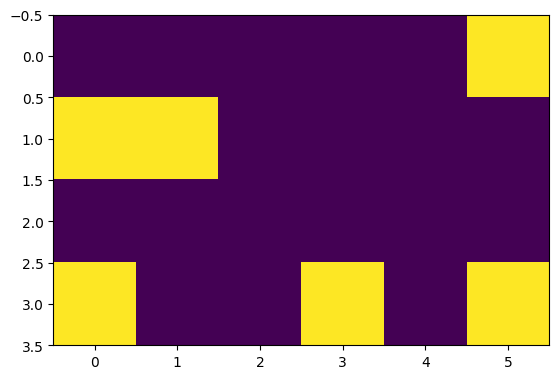